In [1]:
import rdkit
import rdkit.Chem as Chem
import copy

#uses the py3 version of libraries from JT VAE paper
from jtnn.mol_tree import Vocab, MolTree, MolTreeNode

#for graph layout and plotting
import igraph as ig
import matplotlib.pyplot as plt

In [2]:
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
IPythonConsole.ipython_useSVG=True

#### Load data with different smile strings

In [3]:
f = open('jt_data/all.txt', 'r')
Lines = f.readlines()

smile =  CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1
number of atoms =  24


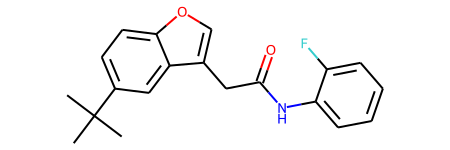

In [4]:
#select one string to test
test_smile = Lines[0].split()[0]
print("smile = ", test_smile)
test_mol = Chem.MolFromSmiles(test_smile)

print("number of atoms = ", test_mol.GetNumAtoms())
test_mol

#### Construct the Mol Tree aka Junction Tree 

In [5]:
JT = MolTree(test_smile)

In [6]:
print("JT size = ", JT.size())
print("JT root id = ", JT.rootid)

print("JT details:")
for i,nd in enumerate(JT.nodes):
    print("id=", i, ":leaf_node=", nd.is_leaf, ":node smile=", nd.smiles, ":node clique=", nd.clique, ":node label=", nd.recover(JT.mol))

JT size =  15
JT root id =  0
JT details:
id= 0 :leaf_node= True :node smile= CC :node clique= [0, 1] :node label= C[CH3:14]
id= 1 :leaf_node= True :node smile= CC :node clique= [1, 2] :node label= C[CH3:14]
id= 2 :leaf_node= True :node smile= CC :node clique= [1, 3] :node label= C[CH3:14]
id= 3 :leaf_node= False :node smile= CC :node clique= [1, 4] :node label= [c:4]1([CH3:14])[cH:11][cH:11][cH:11][cH:11][cH:11]1
id= 4 :leaf_node= False :node smile= CC :node clique= [10, 11] :node label= [CH2:5]([c:5]1[cH:12][cH:12][o:12][cH:12]1)[CH3:6]
id= 5 :leaf_node= False :node smile= CC :node clique= [11, 12] :node label= [CH3:5][CH2:6][CH3:15]
id= 6 :leaf_node= True :node smile= C=O :node clique= [12, 13] :node label= O=[CH2:15]
id= 7 :leaf_node= False :node smile= CN :node clique= [12, 14] :node label= [NH:8]([CH3:9])[CH3:15]
id= 8 :leaf_node= False :node smile= CN :node clique= [14, 15] :node label= [CH3:8][NH:9][c:9]1[cH:13][cH:13][cH:13][cH:13][cH:13]1
id= 9 :leaf_node= True :node smile= C

In [7]:
##test atom id
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx()+1)
    return mol

In [8]:
test_mol_1 = mol_with_atom_index(test_mol)

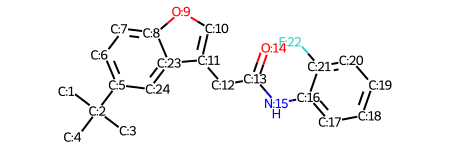

In [9]:
test_mol_1

### MolTree to Molgraph and smile reconstruction example

In [10]:
test_tree = MolTree(test_smile)
test_tree.recover()

In [11]:
from jtnn.chemutils import copy_edit_mol,dfs_assemble,set_atommap

In [12]:
cur_mol = copy_edit_mol(test_tree.nodes[0].mol)

In [13]:
global_amap = [{}] + [{} for node in test_tree.nodes]
global_amap[1] = {atom.GetIdx():atom.GetIdx() for atom in cur_mol.GetAtoms()}

In [14]:
dfs_assemble(cur_mol, global_amap, [], test_tree.nodes[0], None)

[('C[CH3:14]', <rdkit.Chem.rdchem.Mol object at 0x7faed95d98e0>, [(14, 0, 0)])]
[('C[C:14](C)(C)[CH3:4]', <rdkit.Chem.rdchem.Mol object at 0x7faed95e4040>, [(1, 0, 0), (2, 0, 0), (3, 0, 0), (4, 0, 0)])]
[('[c:4]1([CH3:14])[cH:11][cH:11][cH:11][cH:11][cH:11]1', <rdkit.Chem.rdchem.Mol object at 0x7faed95e4160>, [(14, 0, 0), (11, 1, 0)])]
[('[CH3:4][c:11]1[cH:11][cH:11][cH:11][c:11]2[c:11]1[cH:12][cH:12][o:12]2', <rdkit.Chem.rdchem.Mol object at 0x7faed95e4dc0>, [(4, 0, 1), (12, 1, 0), (12, 2, 1)]), ('[CH3:4][c:11]1[cH:11][cH:11][cH:11][c:11]2[c:11]1[o:12][cH:12][cH:12]2', <rdkit.Chem.rdchem.Mol object at 0x7faed95e4e20>, [(4, 0, 1), (12, 1, 1), (12, 2, 0)]), ('[CH3:4][c:11]1[cH:11][cH:11][c:11]2[c:11]([cH:11]1)[cH:12][cH:12][o:12]2', <rdkit.Chem.rdchem.Mol object at 0x7faed95e4d00>, [(4, 0, 1), (12, 2, 0), (12, 3, 1)]), ('[CH3:4][c:11]1[cH:11][cH:11][c:11]2[c:11]([cH:11]1)[o:12][cH:12][cH:12]2', <rdkit.Chem.rdchem.Mol object at 0x7faed95e4f40>, [(4, 0, 1), (12, 2, 1), (12, 3, 0)])]
[('[C

[16:00:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:00:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:00:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:00:37] Explicit valence for atom # 1 C, 5, is greater than permitted
[16:00:37] Explicit valence for atom # 1 C, 6, is greater than permitted
[16:00:37] Explicit valence for atom # 1 C, 6, is greater than permitted
[16:00:37] Explicit valence for atom # 2 C, 5, is greater than permitted
[16:00:37] Explicit valence for atom # 2 C, 5, is greater than permitted
[16:00:37] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:00:37] Explicit valence for atom # 3 C, 5, is greater than permitted
[16:00:37] Explicit valence for atom # 4 C, 5, is greater than permitted
[16:00:37] Explicit valence for atom # 4 C, 5, is greater than permitted
[16:00:37] Explicit valence for atom # 5 C, 5, is greater than permitted
[16:00:37] Explicit valence for atom # 5 C, 5, is g

[('O=[C:15]([CH3:6])[NH2:8]', <rdkit.Chem.rdchem.Mol object at 0x7faed95e4b20>, [(6, 0, 1), (7, 0, 0), (8, 0, 0)])]
[('[NH:8]([CH3:9])[CH3:15]', <rdkit.Chem.rdchem.Mol object at 0x7faed95e4fa0>, [(15, 0, 0), (9, 1, 1)])]
[('[CH3:8][NH:9][c:9]1[cH:13][cH:13][cH:13][cH:13][cH:13]1', <rdkit.Chem.rdchem.Mol object at 0x7faed95e4be0>, [(8, 1, 1), (13, 0, 0)])]
[('F[c:13]1[cH:13][cH:13][cH:13][cH:13][c:13]1[NH2:9]', <rdkit.Chem.rdchem.Mol object at 0x7faed95ec100>, [(9, 0, 0), (10, 1, 0)]), ('F[c:13]1[cH:13][cH:13][cH:13][c:13]([NH2:9])[cH:13]1', <rdkit.Chem.rdchem.Mol object at 0x7faed95ec2e0>, [(9, 0, 0), (10, 2, 0)]), ('F[c:13]1[cH:13][cH:13][c:13]([NH2:9])[cH:13][cH:13]1', <rdkit.Chem.rdchem.Mol object at 0x7faed95ec1c0>, [(9, 0, 0), (10, 3, 0)])]


[16:00:37] Explicit valence for atom # 1 C, 5, is greater than permitted


In [15]:
cur_mol = cur_mol.GetMol()
cur_mol = Chem.MolFromSmiles(Chem.MolToSmiles(cur_mol))
set_atommap(cur_mol)
dec_smiles = Chem.MolToSmiles(cur_mol)

In [16]:
gold_smiles = Chem.MolToSmiles(Chem.MolFromSmiles(test_smile))

In [17]:
print("reco smile = ", gold_smiles)
print("gold smile = ", dec_smiles)
print("orig smile = ", test_smile)

reco smile =  CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1
gold smile =  CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1
orig smile =  CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1


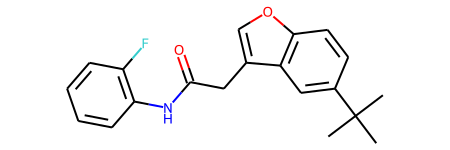

In [18]:
cur_mol

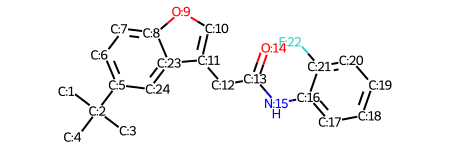

In [19]:
test_mol

#### visualize with rdkit

In [35]:
# save the mol objects  for each JT node to visualize
node_mol_list = []
for nd in JT.nodes:
    node_mol_list.append(Chem.MolFromSmiles(nd.smiles))
print(len(node_mol_list))
    
clique_plots = Draw.MolsToGridImage(node_mol_list, molsPerRow=5, subImgSize=(100, 100), maxMols=15,
                           legends=None, useSVG=True)

15


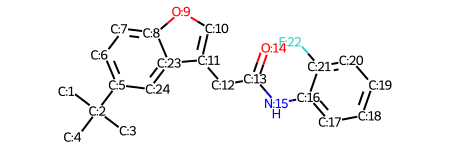

In [36]:
test_mol

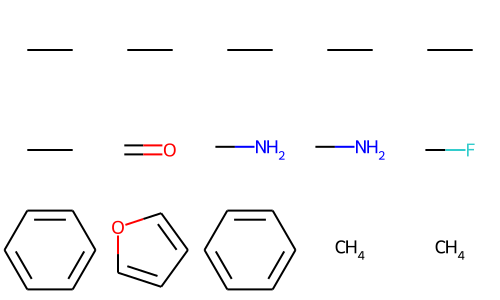

In [37]:
clique_plots

In [23]:
print("JT cliques = ", JT.cliques)
print("JT edges = ", JT.edges)

JT cliques =  [[0, 1], [1, 2], [1, 3], [1, 4], [10, 11], [11, 12], [12, 13], [12, 14], [14, 15], [20, 21], [4, 23, 22, 7, 6, 5], [8, 7, 22, 10, 9], [16, 17, 18, 19, 20, 15], [1], [12]]
JT edges =  [(0, 13), (1, 13), (2, 13), (3, 10), (3, 13), (4, 5), (4, 11), (5, 14), (6, 14), (7, 8), (7, 14), (8, 12), (9, 12), (10, 11)]


#### Visualize JT with different graph layouts

In [24]:
# using ipgraph package provide the JT edges and choose a desired layout
test_mol_JT_graph = ig.Graph(edges=JT.edges)
layout = test_mol_JT_graph.layout(layout='reingold_tilford')
JT_labels = [x for x in range(JT.size())]

In [25]:
print("layout positions:")
for l in layout:
    print(l)

layout positions:
[-1.5, 1.0]
[-0.5, 1.0]
[0.5, 1.0]
[1.5, 1.0]
[1.5, 4.0]
[1.5, 5.0]
[1.0, 7.0]
[2.0, 7.0]
[2.0, 8.0]
[2.0, 10.0]
[1.5, 2.0]
[1.5, 3.0]
[2.0, 9.0]
[0.0, 0.0]
[1.5, 6.0]


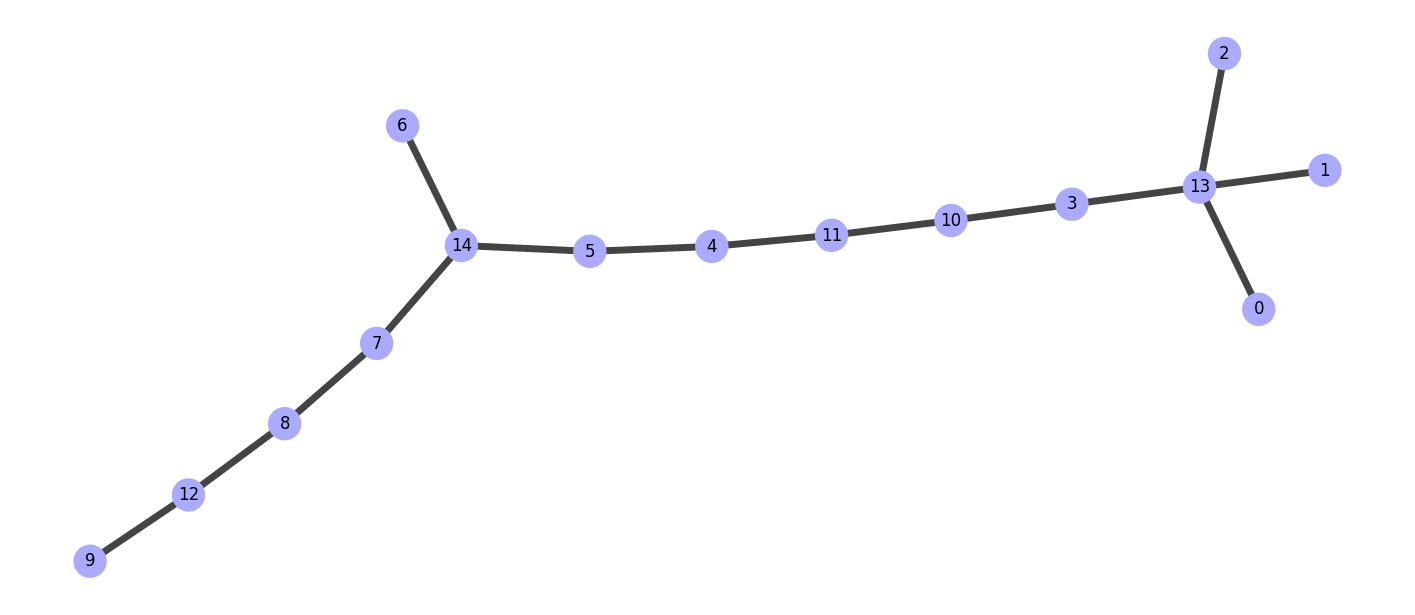

In [29]:
fig, ax = plt.subplots(figsize=(18,12))

ig.plot(test_mol_JT_graph, target=ax, layout="auto", vertex_label = JT_labels, vertex_size = 0.1, vertex_frame_width = 0.0, vertex_color = '#AAAAFF', edge_width=5)
plt.show()